In [1]:
import tensorflow as tf
import keras as K

Using TensorFlow backend.


In [2]:
import pandas as pd
import json
import matplotlib
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from PIL import ImageFile
from tqdm import tqdm
import h5py
import keras
import keras.backend as K
from keras.models import Model
from keras import optimizers
from sklearn.manifold import TSNE
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import backend as K
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, \
    GlobalMaxPool2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, Lambda
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.backend.tensorflow_backend import set_session
from collections import defaultdict
import time
from PIL import Image
from functools import partial
import functools
import cv2 as cv
%pylab inline
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.utils import multi_gpu_model

from PIL import Image
from DataGenerator import *

Populating the interactive namespace from numpy and matplotlib


/root/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
path = 'dataset/'
dataset = []
tags = []
classes = ['manteaux', 'sweatshirts', 't-shirts', 'veste', 'pull', 'pantalons', 'jeans', 'shorts']

In [4]:
#un bout de code pour avoir tous les fichiers de dossiers et sous dossiers
for path, subdirs, files in os.walk(path):
    for name in files:
        file_path = os.path.join(path, name)
        dataset.append(file_path)
        for ind,cls in enumerate(classes):
            if (cls in file_path):
                tags.append(ind)
                break;
#         print (os.path.join(path, name))

In [5]:
#pour melanger uniformemement deux listes 
from random import shuffle

all_data = list(zip(dataset, tags))

shuffle(all_data)

dataset, tags = zip(*all_data)

print (dataset[:5], tags[:5])

('dataset/train/jeans/jeans1147.jpg', 'dataset/test/t-shirts/t-shirts1176.jpg', 'dataset/train/shorts/shorts466.jpg', 'dataset/train/pantalons/pantalons1659.jpg', 'dataset/test/pantalons/pantalons866.jpg') (6, 2, 7, 5, 5)


In [172]:
print(dataset[:100])

('dataset/train/veste/veste1287.jpg', 'dataset/train/veste/veste1341.jpg', 'dataset/train/veste/veste1204.jpg', 'dataset/train/pantalons/pantalons1485.jpg', 'dataset/train/pull/pull332.jpg', 'dataset/train/pull/pull512.jpg', 'dataset/train/pantalons/pantalons1033.jpg', 'dataset/train/pantalons/pantalons1134.jpg', 'dataset/train/veste/veste1775.jpg', 'dataset/train/shorts/shorts183.jpg', 'dataset/train/t-shirts/t-shirts1016.jpg', 'dataset/train/pull/pull481.jpg', 'dataset/train/t-shirts/t-shirts1008.jpg', 'dataset/test/veste/veste1253.jpg', 'dataset/train/shorts/shorts975.jpg', 'dataset/train/veste/veste664.jpg', 'dataset/train/pantalons/pantalons771.jpg', 'dataset/test/sweatshirts/sweatshirts1290.jpg', 'dataset/train/jeans/jeans795.jpg', 'dataset/train/shorts/shorts947.jpg', 'dataset/train/pantalons/pantalons642.jpg', 'dataset/train/pull/pull200.jpg', 'dataset/test/pull/pull488.jpg', 'dataset/train/veste/veste1611.jpg', 'dataset/train/pull/pull105.jpg', 'dataset/train/pull/pull1690.jpg

In [23]:
import os
import os.path

pathsTrain = []
pathsTest = []
def all_paths(path, lst):
    # pour visualiser avoir tous les paths des images du dataset
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in [f for f in filenames if f.endswith(".jpg")]:
            lst.append(os.path.join(dirpath, filename))
#             print (os.path.join(dirpath, filename))

In [24]:
all_paths("./dataset/train/", pathsTrain)
all_paths("./dataset/test/", pathsTest)

In [25]:
print (len(pathsTest))

3007


In [26]:
def which_class(path):
    for ind, cls in enumerate(classes):
        if cls in path:
            return (ind)
    return (0)

<p>Train set</p>

/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


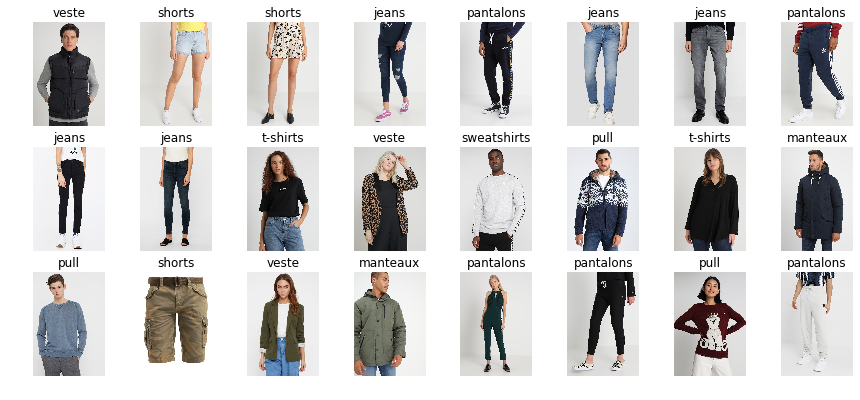

In [27]:
cols = 8
rows = 3
#pour allouer un cadre
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(pathsTrain))
        #on place chacune des images sur le cadre
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(imread(pathsTrain[random_index]))
        ax.set_title(classes[which_class(pathsTrain[random_index])])
plt.show()

<p>Test set</p>

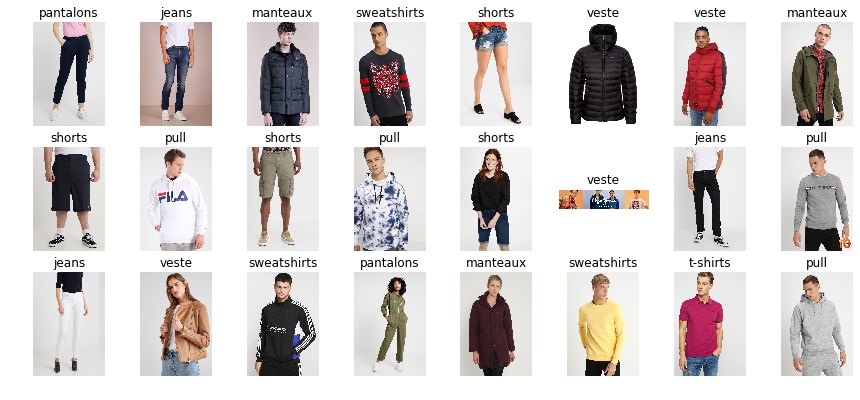

In [31]:
cols = 8
rows = 3
#pour allouer un cadre
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(pathsTest))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(imread(pathsTest[random_index]))
        ax.set_title(classes[which_class(pathsTest[random_index])])
plt.show()

In [32]:
K.clear_session()
from keras.layers.advanced_activations import LeakyReLU

<h1>Training avec architecture perso</h1>

In [46]:
input_shape = (250,250,3)

In [33]:
def create_model_leaky(num_classes, input_shape):
    model = Sequential() # Permet de configurer votre model pour l'entrainement

    model.add(Conv2D(16, (3, 3), input_shape=input_shape, padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, name='predictions'))
    model.add(Activation("softmax"))
    return model

In [34]:
from keras.layers.core import *
model = create_model_leaky(len(classes))

In [39]:
batch_size = 32

transformation_ratio = .05 

In [40]:
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

index = 0
while (True):
    if not os.path.exists('logs/' + str(index)):
        os.makedirs('logs/' + str(index))
        break ;
    index += 1
    
logsName = './logs/zld_leaky_' + str(index) # replace index by the name you want
print (logsName)
tensorboard = keras.callbacks.TensorBoard(log_dir=logsName, 
                                          histogram_freq=0, 
                                          batch_size=batch_size, 
                                          write_graph=True, 
                                          write_grads=True, 
                                          write_images=True, 
                                          embeddings_freq=0,
                                          embeddings_layer_names=None, 
                                          embeddings_metadata=None)

In [41]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=transformation_ratio,
                                   shear_range=transformation_ratio,
                                   zoom_range=transformation_ratio,
                                   cval=transformation_ratio,
                                   horizontal_flip=True,
                                   vertical_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(250, 250),
        batch_size=bacth_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(250, 250),
        batch_size=bacth_size,
        class_mode='categorical')

Found 12010 images belonging to 8 classes.
Found 3007 images belonging to 8 classes.


In [43]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(pathsTrain)/batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=len(pathsTest)/bacth_size)

Epoch 1/5
376/375 [==============================] - 747s 2s/step - loss: 1.9580 - acc: 0.3058 - val_loss: 1.3991 - val_acc: 0.4403
Epoch 2/5
376/375 [==============================] - 426s 1s/step - loss: 1.2745 - acc: 0.4914 - val_loss: 1.1857 - val_acc: 0.5387
Epoch 3/5
376/375 [==============================] - 475s 1s/step - loss: 1.1044 - acc: 0.5603 - val_loss: 1.0378 - val_acc: 0.5896
Epoch 4/5
376/375 [==============================] - 453s 1s/step - loss: 1.0127 - acc: 0.5943 - val_loss: 0.9863 - val_acc: 0.5976
Epoch 5/5
376/375 [==============================] - 461s 1s/step - loss: 0.9660 - acc: 0.6217 - val_loss: 0.9900 - val_acc: 0.6079


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


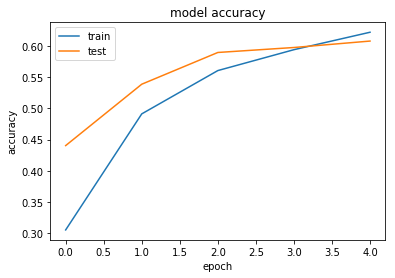

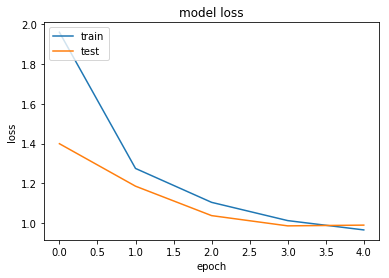

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1>Training avec Resnet</h1>

In [60]:
K.clear_session()

In [61]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [62]:
def resnet50(num_classes, input_shape):
    base_model = ResNet50(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return (model)

In [63]:
model = resnet50(len(classes), input_shape)

In [64]:
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

index = 0
while (True):
    if not os.path.exists('logs/' + str(index)):
        os.makedirs('logs/' + str(index))
        break ;
    index += 1
    
logsName = './logs/zld_res50_' + str(index) # replace index by the name you want
print (logsName)
tensorboard = keras.callbacks.TensorBoard(log_dir=logsName, 
                                          histogram_freq=0, 
                                          batch_size=batch_size, 
                                          write_graph=True, 
                                          write_grads=True, 
                                          write_images=True, 
                                          embeddings_freq=0,
                                          embeddings_layer_names=None, 
                                          embeddings_metadata=None)

./logs/zld_res50_30


In [65]:
for layer in model.layers:
    layer.trainable = True
    if isinstance(layer, keras.layers.BatchNormalization):
        # we do aggressive exponential smoothing of batch norm 
        # parameters to faster adjust to our new dataset
        layer.momentum = 0.8
    
# fix deep layers (fine-tuning only last 50)
for layer in model.layers[:-50]:
    layer.trainable = False

In [66]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = len(pathsTrain)/batch_size,
        epochs = 1,
        validation_data = validation_generator,
        validation_steps = len(pathsTest)/bacth_size)

Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[32,1024,16,16] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node res4f_branch2c/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@train...kpropInput"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](activation_39/Relu, res4f_branch2c/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss/mul/_3727}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_16122_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1>Training avec InceptionV3</h1>

In [ ]:
K.clear_session()

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
def inceptionV3(num_classes, input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)

    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return (model)

In [ ]:
model = inceptionV3(num_classes, input_shape)

In [ ]:
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

index = 0
while (True):
    if not os.path.exists('logs/' + str(index)):
        os.makedirs('logs/' + str(index))
        break ;
    index += 1
    
logsName = './logs/zld_res50_' + str(index) # replace index by the name you want
print (logsName)
tensorboard = keras.callbacks.TensorBoard(log_dir=logsName, 
                                          histogram_freq=0, 
                                          batch_size=batch_size, 
                                          write_graph=True, 
                                          write_grads=True, 
                                          write_images=True, 
                                          embeddings_freq=0,
                                          embeddings_layer_names=None, 
                                          embeddings_metadata=None)

In [ ]:
for layer in model.layers:
    layer.trainable = True
    if isinstance(layer, keras.layers.BatchNormalization):
        # we do aggressive exponential smoothing of batch norm 
        # parameters to faster adjust to our new dataset
        layer.momentum = 0.8
    
# fix deep layers (fine-tuning only last 50)
for layer in model.layers[:-50]:
    layer.trainable = False

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = len(pathsTrain)/batch_size,
        epochs = 5,
        validation_data = validation_generator,
        validation_steps = len(pathsTest)/bacth_size)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()